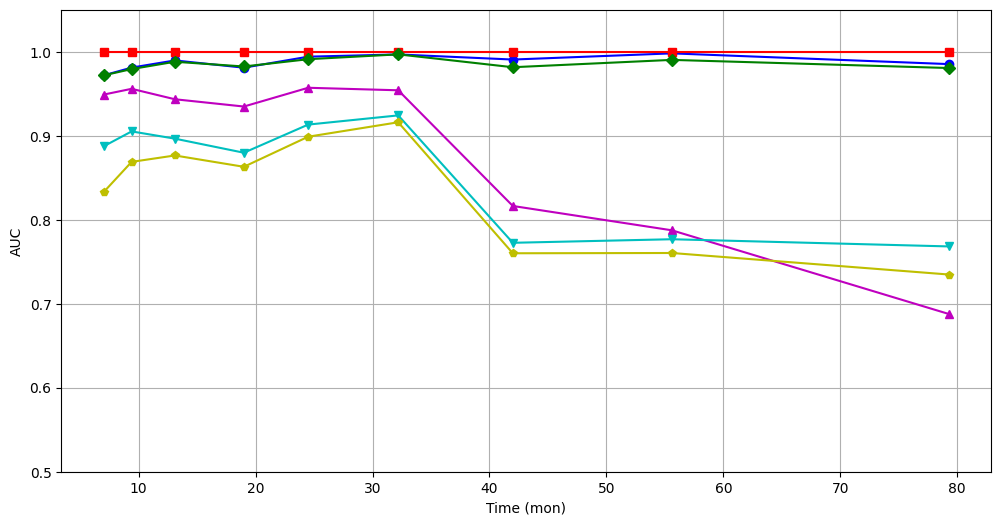

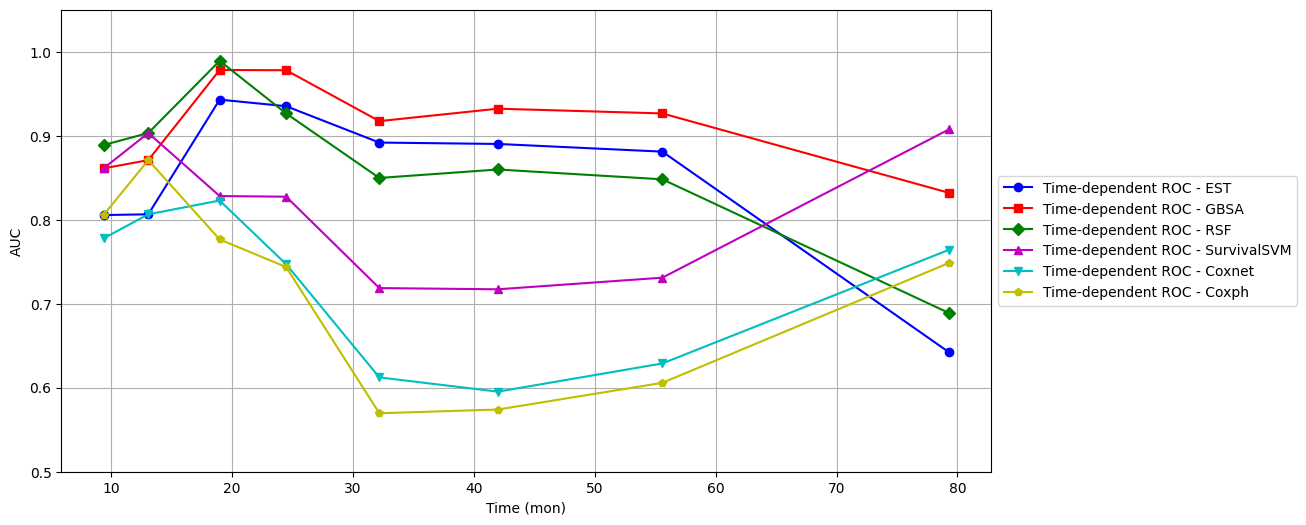

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def clean_auc_values(auc_string):
    try:
        # 删除可能的括号并转换为浮动
        return float(auc_string.strip('[]'))
    except ValueError as e:
        print(f"Error converting {auc_string} to float: {e}")
        return None

def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        df.dropna(inplace=True)
        df['Training AUC'] = df['Training AUC'].apply(clean_auc_values)
        df['Validation AUC'] = df['Validation AUC'].apply(clean_auc_values)
        return df
    except Exception as e:
        print(f"Error loading data from {file_path}: {e}")
        return None

def plot_auc(dataframes, labels, auc_type='Training', show_legend=False, save_as_tif=False, file_name=None):
    plt.figure(figsize=(12, 6))
    colors = ['b', 'r', 'g', 'm', 'c', 'y']  # 定义更多颜色
    markers = ['o', 's', 'D', '^', 'v', 'p']  # 定义更多标记

    for i, (df, label) in enumerate(zip(dataframes, labels)):
        if df is not None:
            plt.plot(df['Time'], df[f'{auc_type} AUC'], f'{colors[i]}-{markers[i]}', label=f'Time-dependent ROC - {label}')

    plt.xlabel('Time (mon)')
    plt.ylabel('AUC')
    plt.ylim(0.5, 1.05)  # 设置y轴范围
    if show_legend:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)

    if save_as_tif and file_name:
        plt.savefig(file_name, format='tiff', bbox_inches='tight')

    plt.show()
    
def load_and_plot_auc(file_est, file_gbsa, file_rsf, file_survivalsvm, file_coxnet, file_coxph):
    df_est = load_data(file_est)
    df_gbsa = load_data(file_gbsa)
    df_rsf = load_data(file_rsf)
    df_survivalsvm = load_data(file_survivalsvm)
    df_coxnet = load_data(file_coxnet)
    df_coxph = load_data(file_coxph)

    dataframes = [df_est, df_gbsa, df_rsf, df_survivalsvm, df_coxnet, df_coxph]
    labels = ['EST', 'GBSA', 'RSF', 'SurvivalSVM', 'Coxnet', 'Coxph']

    # Plot Training AUC without legend and save as TIFF
    plot_auc(dataframes, labels, auc_type='Training', show_legend=False, save_as_tif=True, file_name='training_auc.tiff')
    
    # Plot Validation AUC with legend and save as TIFF
    plot_auc(dataframes, labels, auc_type='Validation', show_legend=True, save_as_tif=True, file_name='validation_auc.tiff')

# 确保CSV文件位于工作目录中或提供正确的路径.
load_and_plot_auc('file_est.csv', 'file_gbsa.csv', 'file_rsf.csv', 'file_survivalsvm.csv', 'file_coxnet.csv', 'file_coxph.csv')
